Em clima de Copa do Mundo, vamos praticar Análise de Dados com o dataset contendo diversas informações sobre todas as partidas da Copa.

Gere gráficos para tentar responder as seguintes perguntas:

- Quais são os maiores ganhadores da Copa do Mundo?

- Quais são as seleções que mais participaram de edições da Copa do Mundo?

- Quais são as seleções que mais jogaram na Copa do Mundo?

- Quais são as seleções com as maiores quantidades de gols feitos?

- Qual é o retrospecto do Brasil na Copa? (Vitória, Empate e Derrota)

- Quais foram as partidas com a maior quantidade de gols?

- Como a média de espectadores mudou com o passar das edições?

- Quais estádios tiveram a maior quantidade de espectadores?

Além das perguntas já estabelecidas neste exercício, aproveite para também gerar novas análises que o grupo acredite ser pertinente ao problema. :)


In [ ]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt

In [ ]:
cop=pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/WorldCupMatches.csv')

In [ ]:
cop['Stage'].value_counts()

Round of 16                 72
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group C                     48
Group D                     48
Group E                     48
Group F                     48
Semi-finals                 36
Group G                     30
Group H                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Third place                  2
Play-off for third place     2
Name: Stage, dtype: int64

In [ ]:
cop.drop_duplicates(inplace=True)
cop=cop.dropna(subset=['Datetime'])
c=list(set(cop[cop['Home Team Name'].str.contains('>')]['Home Team Name'].unique().tolist()))
c.extend(['Germany FR', 'IR Iran'])
r = [x.split('>')[-1] for x in c]

In [ ]:
cop['Home Team Name'].replace(dict_changes,inplace=True)
cop['Away Team Name'].replace(dict_changes,inplace=True)

In [ ]:
cop['champion'] = np.nan
def get_champion(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        row['champion'] = row['Home Team Name']
    elif row['Home Team Goals'] < row['Away Team Goals']:
        row['champion'] = row['Away Team Name']
    else:
        if (row['Win conditions'] == ' ') or (row['Win conditions'] is None):
            row['champion'] = 'Tie'
        else:
            row['champion'] = row['Win conditions'].split(' win')[0]
    return row



cop=cop.apply(get_champion, axis=1)

In [ ]:
cop.loc[cop['champion'] == '','champion'] = ['Germany','Argentina','Argentina','Germany']

In [ ]:
title = cop[cop['Stage'] == 'Final']['champion'].value_counts()

Text(0.5, 1.0, 'Campeões ')

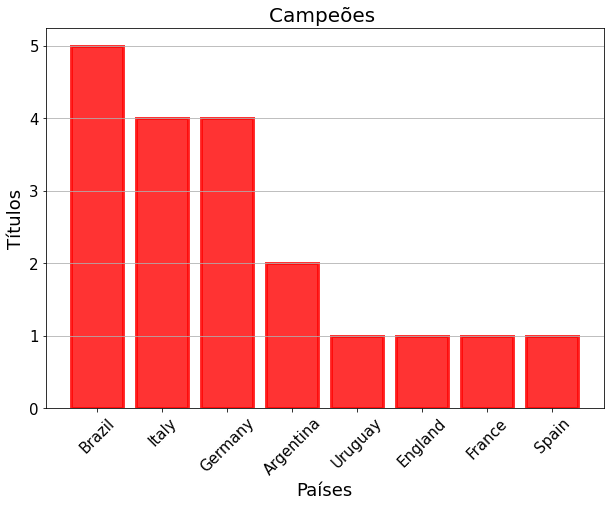

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.bar(title.index, title.values, color='Red', edgecolor='Red', alpha=0.8, linewidth=3)
plt.grid(axis='y')
plt.xticks(fontsize=15, rotation = 45);
plt.xlabel('Países',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Títulos',fontsize=18)
plt.title('Campeões ',fontsize=20)

In [ ]:
h= cop.groupby(['Year', 'Home Team Name']).count()['Home Team Goals'].to_frame().reset_index()\
          .rename(columns={'Home Team Name': 'Name', 'Home Team Goals':'Home Matches'}).set_index(['Year','Name'])

w= cop.groupby(['Year', 'Away Team Name']).count()['Away Team Goals'].to_frame().reset_index()\
          .rename(columns={'Away Team Name': 'Name', 'Away Team Goals':'Away Matches'}).set_index(['Year','Name'])

In [ ]:
cop_concat = pd.concat([h, w], axis='columns')

cop_concat.fillna(0,inplace=True)

cop_concat['Matches'] = cop_concat['Home Matches'] + cop_concat['Away Matches']

In [ ]:
teams = cop_concat.reset_index()['Name'].value_counts().head(10)

Text(0.5, 1.0, 'Participações na  Copa ')

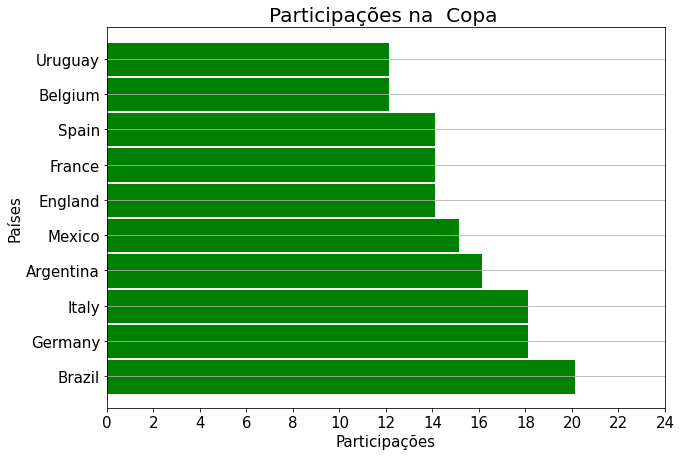

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(teams.index, teams.values, color='green', edgecolor='green', linewidth=5)

plt.grid(axis='y')
plt.xticks( np.arange(0, 25, 2), fontsize=15);
plt.xlabel('Participações',fontsize=15)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=15)
plt.title('Participações na  Copa ',fontsize=20)

In [ ]:
total= cop_concat.reset_index().groupby('Name').agg({'Matches': 'sum'}).sort_values(by='Matches', ascending=False)

In [ ]:
top_10 = total.head(10)

Text(0.5, 1.0, 'Participações na Copa')

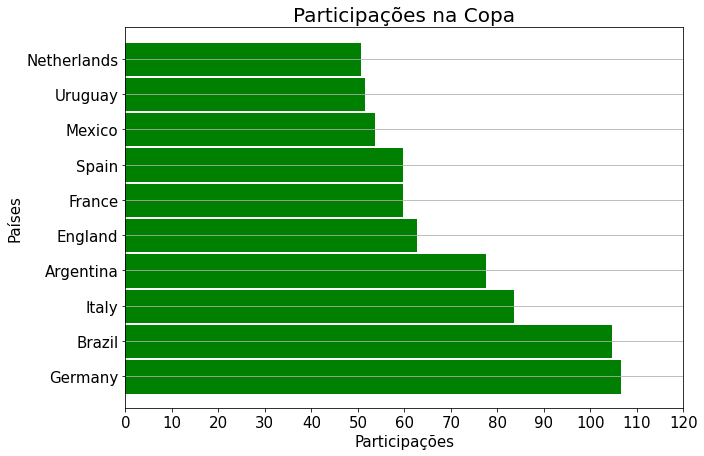

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(top_10.index, top_10['Matches'], color='green', edgecolor='green', linewidth=5)
plt.grid(axis='y')
plt.xticks(np.arange(0, 125, 10), fontsize=15);
plt.xlabel('Participações',fontsize=15)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=15)
plt.title('Participações na Copa',fontsize=20)

In [ ]:

home_goals = cop.groupby(['Year', 'Home Team Name']).agg({'Home Team Goals':'sum'})\
.reset_index().rename(columns={'Home Team Name': 'Name'}).set_index(['Year','Name'])

away_goals = cop.groupby(['Year', 'Away Team Name']).agg({'Away Team Goals':'sum'})\
.reset_index().rename(columns={'Away Team Name': 'Name'}).set_index(['Year','Name'])

total= pd.concat([home_goals, away_goals], axis='columns')

total.fillna(0,inplace=True)

total['Total G'] = total['Home Team Goals'] + total['Away Team Goals']

In [ ]:
goals =total.reset_index()
goalls = goals.groupby('Name').agg({'Total G':'sum'}).sort_values(by='Total G',ascending=False)

In [ ]:
top_10_scores = goalls.head(10)

Text(0.5, 1.0, 'Participações em Copa do Mundo')

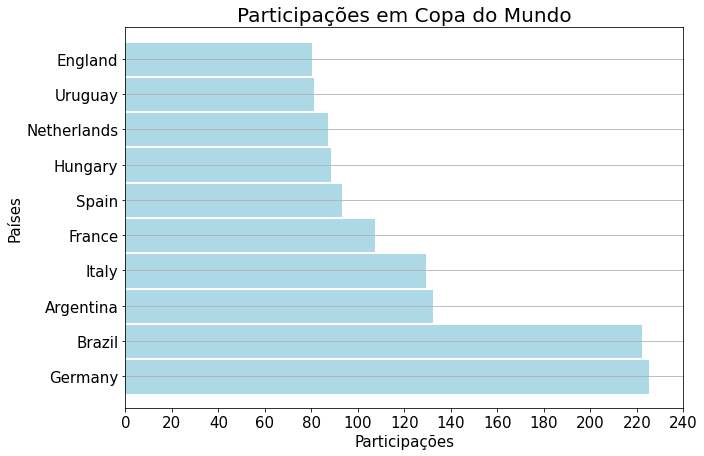

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(top_10_scores.index, top_10_scores['Total G'], color='lightblue', edgecolor='lightblue', linewidth=5)
plt.grid(axis='y')
plt.xticks(np.arange(0, 250, 20), fontsize=15);
plt.xlabel('Participações',fontsize=15)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=15)
plt.title('Participações em Copa do Mundo',fontsize=20)

In [ ]:
_br = cop[(cop['Home Team Name'] == 'Brazil') | (cop['Away Team Name'] == 'Brazil')]
_br.loc[_br['champion'] == 'Brazil','champion'] = 'Win'
cop[(cop['Home Team Name'] == 'Brazil') | (cop['Away Team Name'] == 'Brazil')].loc[~_br['champion'].isin(['Win','Tie']),'champion'] = 'Lose'

In [ ]:
cap = _br['champion'].value_counts()

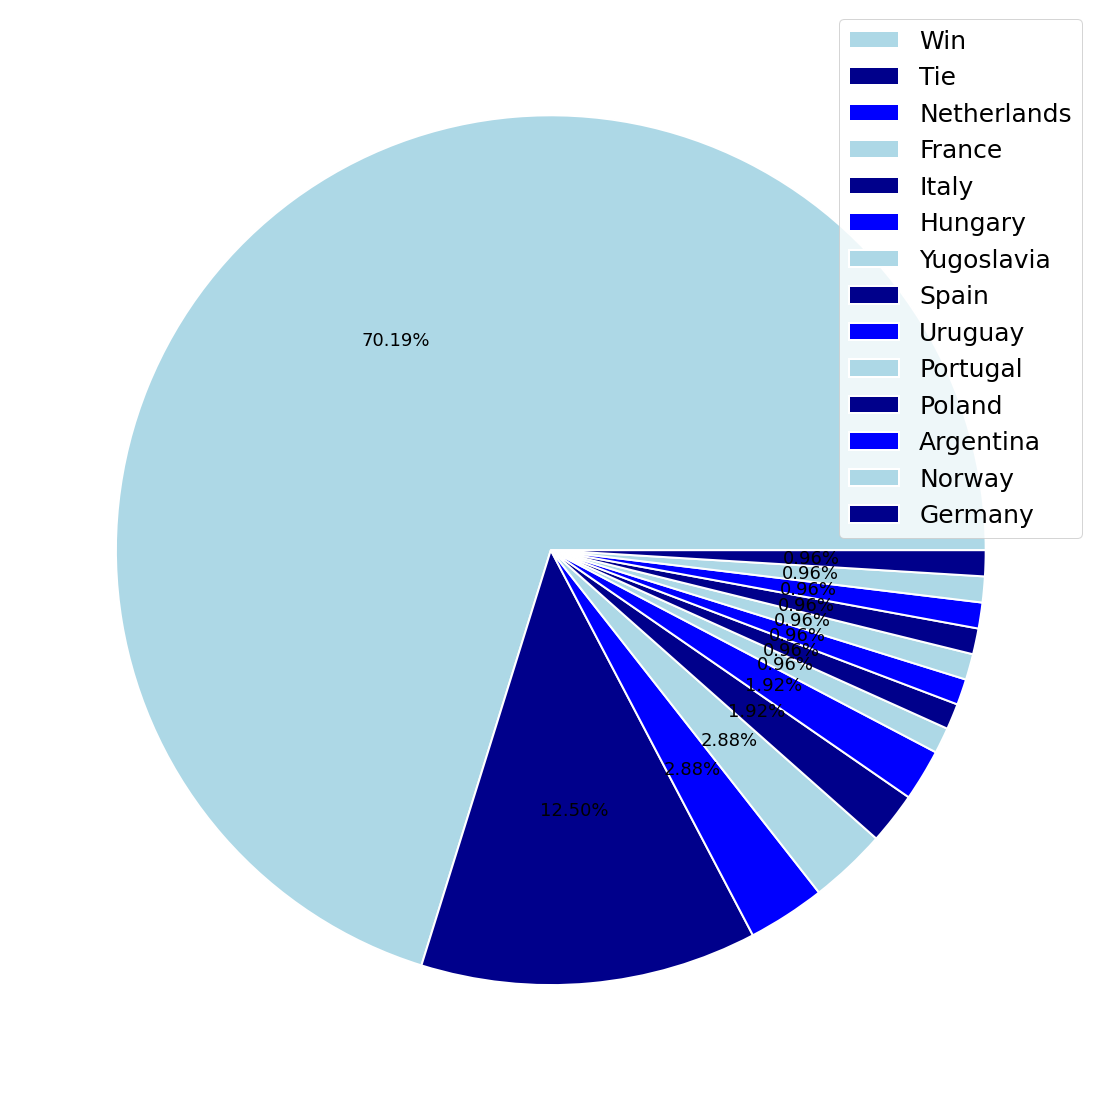

In [ ]:
plt.figure(figsize=(20,20))
wedgeprops={"edgecolor":"white",'linewidth': 2, 'antialiased': True}
plt.pie(cap.values, autopct='%.2f%%', colors=['lightblue','darkblue','blue'],wedgeprops=wedgeprops ,textprops={'fontsize': 18, 'color':'black'});
plt.legend(cap.index, prop={'size':25})

In [ ]:
ct = cop.groupby('Year').agg({'Attendance':'sum'})
ct.loc[1942,'Attendance'] = 0
ct.loc[1946,'Attendance'] = 0

In [ ]:
ct = ct.sort_index()

In [ ]:
list_hosts = ['Uruguay','Italy','NA','NA','France','Brazil','Switzerland','Sweden','Chile','England','Mexico',
              'Germany','Argentina','Spain','Mexico','Italy','United States','France','Japan/Korea','Germany','South Africa','Brazil']

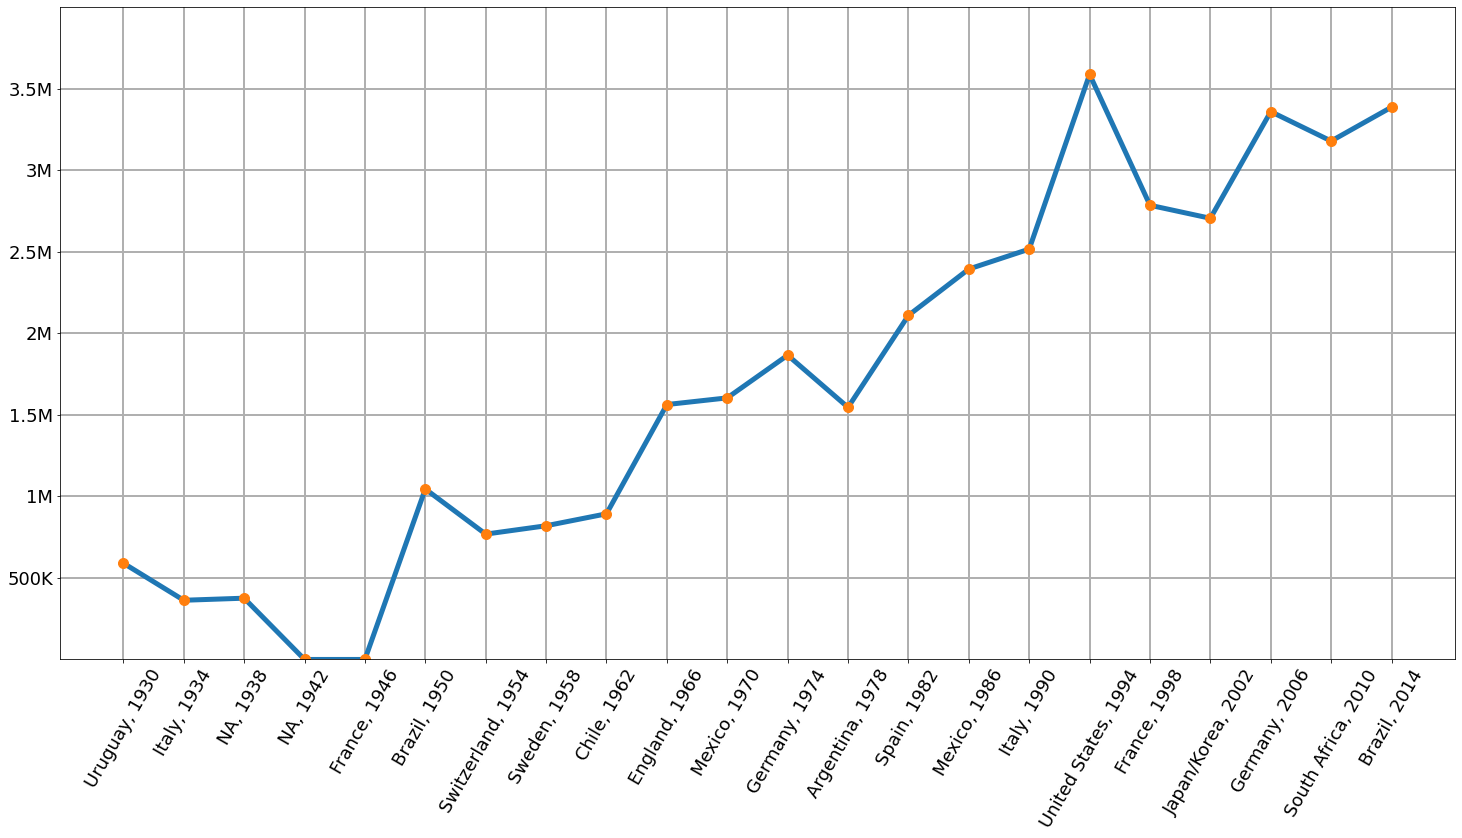

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(ct.index,ct['Attendance'], linewidth=5)
plt.plot(ct.index, ct['Attendance'], 'o', markersize=10)

yvals = np.arange(500000, 4000000, 500000)
plt.yticks(yvals, ['500K','1M', '1.5M', '2M', '2.5M', '3M', '3.5M'], fontsize=18);
xvals = np.arange(1930, 2018, 4)
xalias = [hosts + ', ' + str(edition) for hosts,edition in zip(list_hosts, xvals)]

plt.xticks(xvals, xalias, rotation=60, fontsize=18);
plt.grid(linewidth=2)
plt.ylim([0,4000000]);
